<a href="https://colab.research.google.com/github/jainam-shah1/Linear-Algebra-Projects/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis
> Jainam Shah

> Imported the inbuilt dataset as required.

In [ ]:
attach(longley)

#### Dataset preview

In [ ]:
head(longley, 3)

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171


> Seven economic variables

In [ ]:
summary(longley)

  GNP.deflator         GNP          Unemployed     Armed.Forces  
 Min.   : 83.00   Min.   :234.3   Min.   :187.0   Min.   :145.6  
 1st Qu.: 94.53   1st Qu.:317.9   1st Qu.:234.8   1st Qu.:229.8  
 Median :100.60   Median :381.4   Median :314.4   Median :271.8  
 Mean   :101.68   Mean   :387.7   Mean   :319.3   Mean   :260.7  
 3rd Qu.:111.25   3rd Qu.:454.1   3rd Qu.:384.2   3rd Qu.:306.1  
 Max.   :116.90   Max.   :554.9   Max.   :480.6   Max.   :359.4  
   Population         Year         Employed    
 Min.   :107.6   Min.   :1947   Min.   :60.17  
 1st Qu.:111.8   1st Qu.:1951   1st Qu.:62.71  
 Median :116.8   Median :1954   Median :65.50  
 Mean   :117.4   Mean   :1954   Mean   :65.32  
 3rd Qu.:122.3   3rd Qu.:1958   3rd Qu.:68.29  
 Max.   :130.1   Max.   :1962   Max.   :70.55  

# Write a function in R called myPCA with the following properties:

#### 1. The function must have 2 inputs:

* a data frame that contains the data set

* a scaler that denotes the desired percentage of variance preserved in the transformed data set

#### Using the provided data performed the task and obtained the same expected results by
* Calculating eigen of the matrix to get covarience
* Extracting the features
* Get the Principal Component Matrix from the eigen function
* Calculate PCA score
* Generate tranformed matrix
* Cumulative sum upto the retention variance percetage
* Choosing important PCAs
* Ouput the list of required results

In [ ]:
# function declaration
myPCA <- function (dataframe, perc_var){
  # head(dataframe);

  # Compute variance of each variable & Create new data frame with centered variables
  scaled_df <- apply(dataframe, 2, scale)

  # Calculate Eigenvalues & Eigenvectors
  dataframe.cov <- cov(scaled_df)
  dataframe.eigen <- eigen(dataframe.cov)
  str(dataframe.eigen)

  # Extract the loadings
  (phi <- dataframe.eigen$vectors)

  # Principal_components_matrix
  phi <- -phi
  row.names(phi) <- c("GNP.deflator","GNP","Unemployed","Armed.Froces","Population")
  colnames(phi) <- c("PC1","PC2","PC3","PC4","PC5")
  print(phi)


  # Calculate Principal Components scores
  PC1 <- as.matrix(scaled_df) %*% phi[,1]
  PC2 <- as.matrix(scaled_df) %*% phi[,2]
  PC3 <- as.matrix(scaled_df) %*% phi[,3]
  PC4 <- as.matrix(scaled_df) %*% phi[,4]
  PC5 <- as.matrix(scaled_df) %*% phi[,5]


  # Create data frame with Principal Components scores "Transformed_data_matrix"
  PC <- data.frame(Year = row.names(dataframe), PC1, PC2, PC3, PC4, PC5)

  PVE <- dataframe.eigen$values / sum(dataframe.eigen$values)
  # round(PVE, 2)

  # Cumulative sum upto the retention variance percetage
  num_PC = which(cumsum(PVE) >= perc_var)[1]

  # Choosing important PCAs
  final_PC = phi[,seq(1, num_PC, by=1)]
  # print(final_PC)

  print('------------------------------------------------------------------------------------------------------------------------')
  print('-----------------------------------------------        OUTPUT        -------------------------------------------------')
  print('------------------------------------------------------------------------------------------------------------------------')
  output = list("minimum_number" = num_PC, "principal_components_matrix" = final_PC, "transformed_data_matrix" = head(PC, n = 5))
  print(output)
}

d = longley[, -c(6,7)]

# function calling
myPCA(d, 0.98);

List of 2
 $ values : num [1:5] 3.609669 1.17534 0.199155 0.014882 0.000953
 $ vectors: num [1:5, 1:5] -0.521 -0.52 -0.366 -0.23 -0.521 ...
 - attr(*, "class")= chr "eigen"
                   PC1         PC2        PC3          PC4          PC5
GNP.deflator 0.5210129 -0.05808997 -0.1889153  0.776958379 -0.292946852
GNP          0.5199086 -0.05345522 -0.3174971 -0.135947010  0.779455948
Unemployed   0.3658062  0.59532321  0.7100763  0.004614581  0.086870665
Armed.Froces 0.2296424 -0.79831473  0.5511572 -0.078584283  0.002874243
Population   0.5212397  0.04529867 -0.2356355 -0.609637027 -0.546878225
[1] "------------------------------------------------------------------------------------------------------------------------"
[1] "-----------------------------------------------        OUTPUT        -------------------------------------------------"
[1] "------------------------------------------------------------------------------------------------------------------------"
$minimum_number


> #### Above result shows
* The minimum number of principal components that is necessary to retain the desired variance specified by the user 2.
* The principal components corresponding to previous part, in a matrix
* The transformed data set in a matrix

#### Using the prcomp inbuild function performed the task and observed the same results below.

In [ ]:
# function declaration
myPCA <- function (dataframe, perc_var){
  # Computing principle component analysis (scale and center and logical value )
  dPCA = prcomp(dataframe, scale = TRUE, center = TRUE, ); dPCA

  print(attributes(dPCA))
  # Standard deviations in each principal component
  # Sqrtof Eigenvalues of correlation matrix
  # print(dPCA$sdev)
  # print(dPCA$rotation)

  # Variance
  dPCA.var = dPCA$sdev ^ 2

  # proportion variance
  PVE = dPCA.var / sum(dPCA.var)

  # Cumulative sum upto the retention variance percetage
  num_dPCA = which(cumsum(PVE) >= perc_var)[1]

  # Choosing important PCAs
  final_dPCA = dPCA$rotation[,seq(1, num_dPCA, by=1)]

  output = list("minimum_number" = num_dPCA, "principal_components_matrix" = final_dPCA, "transformed_data_matrix" = dPCA$x)
  print("------------------------------------------")
  print(output)
}


2. The function must have 3 outputs returned in a list, called number, PCA, and transformed:

* the minimum number of principal components that is necessary to retain the desired variance
specified by the user
* the principal components corresponding to previous part, in a matrix
* the transformed data set in a matrix


In [ ]:
d = longley[, -c(6,7)]

# function calling
myPCA(d, 0.98);

List of 2
 $ values : num [1:5] 3.609669 1.17534 0.199155 0.014882 0.000953
 $ vectors: num [1:5, 1:5] -0.521 -0.52 -0.366 -0.23 -0.521 ...
 - attr(*, "class")= chr "eigen"
                   PC1         PC2        PC3          PC4          PC5
GNP.deflator 0.5210129 -0.05808997 -0.1889153  0.776958379 -0.292946852
GNP          0.5199086 -0.05345522 -0.3174971 -0.135947010  0.779455948
Unemployed   0.3658062  0.59532321  0.7100763  0.004614581  0.086870665
Armed.Froces 0.2296424 -0.79831473  0.5511572 -0.078584283  0.002874243
Population   0.5212397  0.04529867 -0.2356355 -0.609637027 -0.546878225
[1] "------------------------------------------------------------------------------------------------------------------------"
[1] "-----------------------------------------------        OUTPUT        -------------------------------------------------"
[1] "------------------------------------------------------------------------------------------------------------------------"
$minimum_number


Run your function on the first 5 features of R longley data set with the desired retained variance of 0.98.

In [ ]:
d = longley[, -c(6,7)]

# function calling
myPCA(head(d, n = 5), 0.98);

List of 2
 $ values : num [1:5] 3.71 1.13 1.23e-01 3.81e-02 3.07e-16
 $ vectors: num [1:5, 1:5] -0.505 -0.515 0.14 -0.48 -0.478 ...
 - attr(*, "class")= chr "eigen"
                    PC1         PC2         PC3        PC4         PC5
GNP.deflator  0.5053955  0.07883559 -0.46003989 -0.7161816 -0.11750569
GNP           0.5154473  0.05670439 -0.20753725  0.3825379  0.73599716
Unemployed   -0.1402573  0.90035139  0.27686893 -0.2134636  0.21788109
Armed.Froces  0.4799842 -0.23365314  0.81718283 -0.2159454  0.02451884
Population    0.4783645  0.35403833 -0.02911041  0.4985475 -0.62962470
[1] "------------------------------------------------------------------------------------------------------------------------"
[1] "-----------------------------------------------        OUTPUT        -------------------------------------------------"
[1] "------------------------------------------------------------------------------------------------------------------------"
$minimum_number
[1] 3

$princi

> #### Above result shows
* The minimum number of principal components that is necessary to retain the desired variance specified by the user 2.
* the principal components corresponding to previous part, in a matrix
* the transformed data set in a matrix


In [ ]:
library(stats)
dPCA = prcomp(d, scale = TRUE)

In [ ]:
dPCA

Standard deviations (1, .., p=5):
[1] 1.89991292 1.08413093 0.44626826 0.12199281 0.03087773

Rotation (n x k) = (5 x 5):
                   PC1         PC2        PC3          PC4          PC5
GNP.deflator 0.5210129 -0.05808997  0.1889153  0.776958379  0.292946852
GNP          0.5199086 -0.05345522  0.3174971 -0.135947010 -0.779455948
Unemployed   0.3658062  0.59532321 -0.7100763  0.004614581 -0.086870665
Armed.Forces 0.2296424 -0.79831473 -0.5511572 -0.078584283 -0.002874243
Population   0.5212397  0.04529867  0.2356355 -0.609637027  0.546878225

In [ ]:
predict(dPCA, newdata = head(longley[, -c(6,7)]))

,PC1,PC2,PC3,PC4,PC5
1947,-3.1031746,0.7519905,0.29187307,-0.164215614,0.006237107
1948,-2.6857734,0.8495010,0.63281993,0.122620708,0.042355835
1949,-2.0379258,1.5402521,-0.49603161,-0.008466046,0.007863283
1950,-1.8680442,1.2766319,-0.12473100,-0.057963320,-0.043499782
1951,-1.2385402,-1.2356542,-0.02309218,0.093478781,-0.009116973
1952,-0.8650172,-1.9220172,-0.15690972,0.044169280,0.008545465


[1] "Correlation between features"


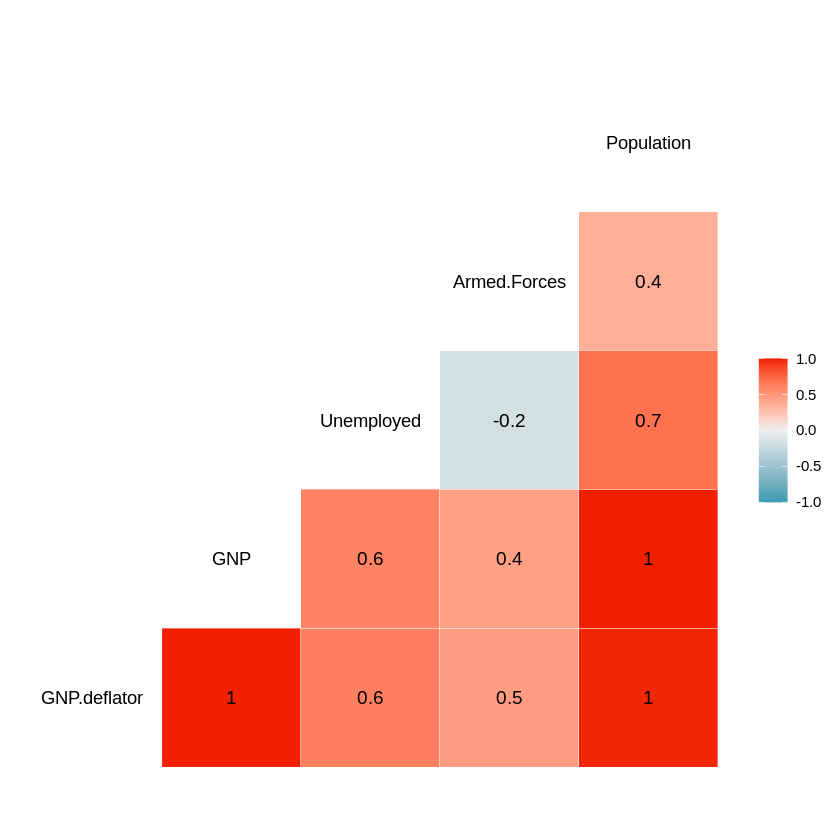

In [ ]:
# install.packages("GGally")
library(GGally)
library(dplyr)

print("Correlation between features")

longley[, -c(6, 7)] %>% ggcorr(label = T)

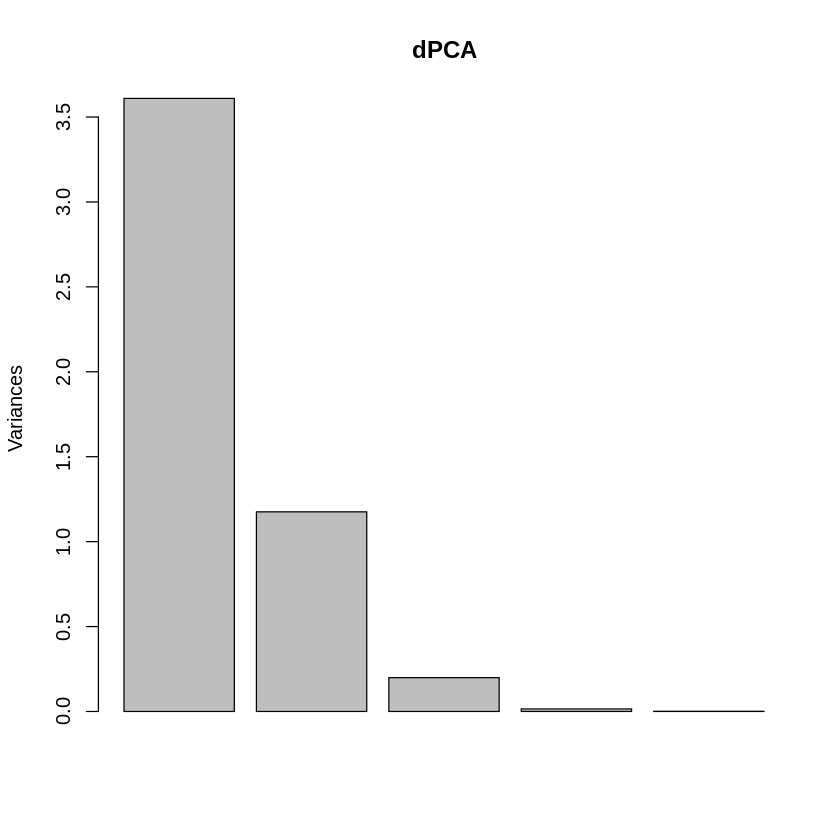

In [ ]:
plot(dPCA)
screeplot(dPCA)

> #### Screeplot
displays the
proportion of the total variation in
a dataset that is explained by each
of the components in a principle
component analysis. Helps to
identify how many of the
components are needed to
summaries the data.